80% frontier goals time = 2.61 +/- 0.28 min
80% frontier gain time = 2.97 +/- 0.26 min
80% unseen gain time = 3.02 +/- 0.25 min
3min volume explored for frontier goals = 16.2 +/- 3.1 %
3min volume explored for frontier gain = 20.0 +/- 2.1 %
3min volume explored for unseen gain = 19.2 +/- 3.3 %


(0.0, 5.0)

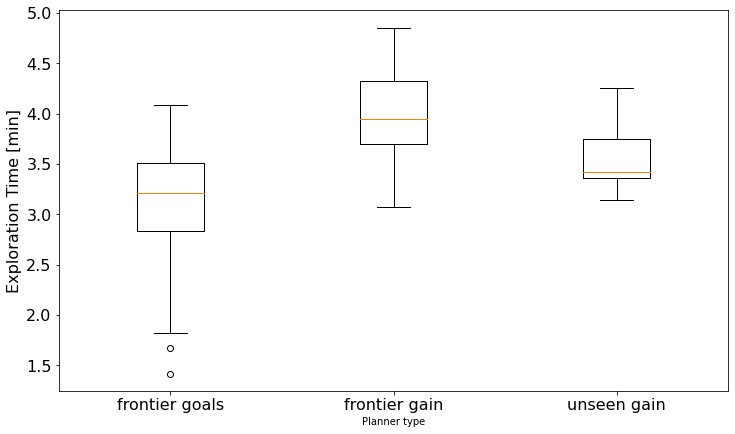

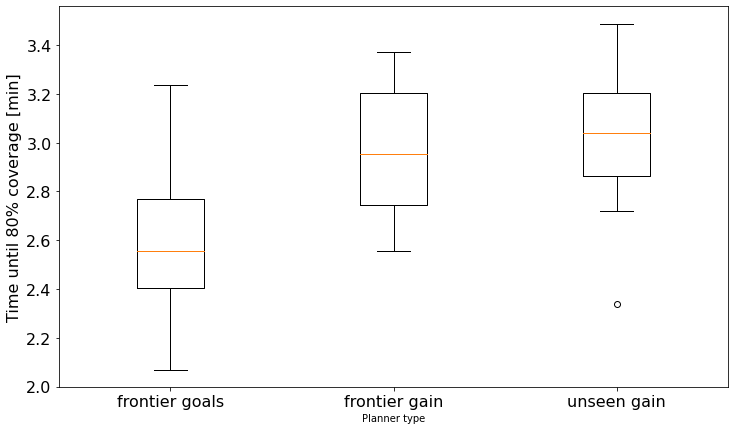

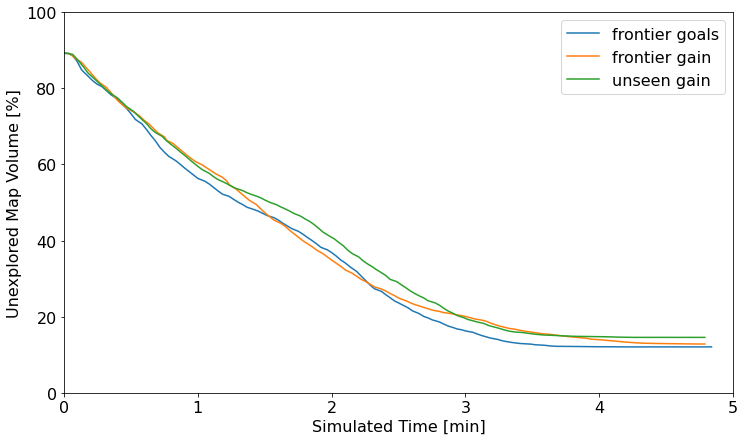

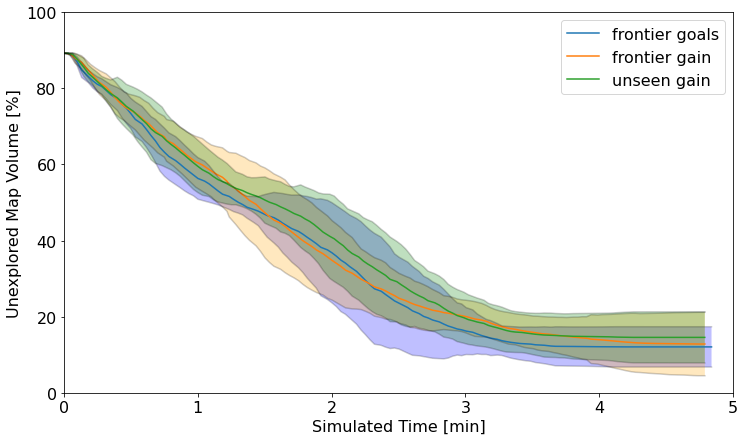

In [4]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from explore_stats import get_cutoffs_finishes_and_ratios

path = "/home/andrew/tests/data/gain/test_set5_range_8m/"
path = "/home/andrew/tests/data/gain/test_set4_range_8m/csv/"
sub_string = ""
voxel_size = 0.2

frontier_only_data = []
frontier_gain_data = []
unseen_gain_data = []


for filename in os.listdir(path):
    if ("map" in filename):
        data = np.array(np.genfromtxt(path + filename, delimiter=",", skip_header=1))
        if ("frontier_only" in filename):
            frontier_only_data.append(data[:, 1])
            t0 = data[:,0] - data[0,0]
        if ("frontier_efficiency" in filename):
            frontier_gain_data.append(data[:, 1])
            t1 = data[:,0] - data[0,0]
        if ("unseen_efficiency" in filename):
            unseen_gain_data.append(data[:, 1])
            t2 = data[:,0] - data[0,0]


# Make all the map arrays the same length in the set
for i in range(0,len(frontier_only_data)):
    if (i==0):
        n_frontier_only = len(frontier_only_data[i])
        n_frontier_gain = len(frontier_gain_data[i])
        n_unseen_gain = len(unseen_gain_data[i])
    else:
        n_frontier_only = min(len(frontier_only_data[i]), n_frontier_only)
        n_frontier_gain = min(len(frontier_gain_data[i]), n_frontier_gain)
        n_unseen_gain = min(len(unseen_gain_data[i]), n_unseen_gain)

frontier_only_mat = np.zeros((n_frontier_only, len(frontier_only_data)))
frontier_gain_mat = np.zeros((n_frontier_gain, len(frontier_gain_data)))
unseen_gain_mat = np.zeros((n_unseen_gain, len(unseen_gain_data)))

for i in range(0,len(frontier_only_data)):
    frontier_only_mat[:,i] = frontier_only_data[i][:n_frontier_only]
    frontier_gain_mat[:,i] = frontier_gain_data[i][:n_frontier_gain]
    unseen_gain_mat[:,i] = unseen_gain_data[i][:n_unseen_gain]

max_volume_frontier_only = frontier_only_mat.max()
max_volume_frontier_gain = frontier_gain_mat.max()
max_volume_unseen_gain = unseen_gain_mat.max()
max_volume_subway = np.max([max_volume_frontier_only, max_volume_frontier_gain, max_volume_unseen_gain])

frontier_only_mat = 1.0 - frontier_only_mat/max_volume_subway
frontier_gain_mat = 1.0 - frontier_gain_mat/max_volume_subway
unseen_gain_mat = 1.0 - unseen_gain_mat/max_volume_subway

frontier_only_avg = np.mean(frontier_only_mat, axis=1)
frontier_gain_avg = np.mean(frontier_gain_mat, axis=1)
unseen_gain_avg = np.mean(unseen_gain_mat, axis=1)

frontier_only_cutoffs, frontier_only_finishes, frontier_only_ratios_at_3min = get_cutoffs_finishes_and_ratios(t0*10.0/60.0, frontier_only_mat, 0.2, 0.001, 5, 3.0)
frontier_gain_cutoffs, frontier_gain_finishes, frontier_gain_ratios_at_3min = get_cutoffs_finishes_and_ratios(t1*10.0/60.0, frontier_gain_mat, 0.2, 0.001, 5, 3.0)
unseen_gain_cutoffs, unseen_gain_finishes, unseen_gain_ratios_at_3min = get_cutoffs_finishes_and_ratios(t2*10.0/60.0, unseen_gain_mat, 0.2, 0.001, 5, 3.0)
print("80%% frontier goals time = %0.2f +/- %0.2f min" % (np.average(frontier_only_cutoffs), np.std(frontier_only_cutoffs)) )
print("80%% frontier gain time = %0.2f +/- %0.2f min" % (np.average(frontier_gain_cutoffs), np.std(frontier_gain_cutoffs)) )
print("80%% unseen gain time = %0.2f +/- %0.2f min" % (np.average(unseen_gain_cutoffs), np.std(unseen_gain_cutoffs)) )

print("3min volume explored for frontier goals = %0.1f +/- %0.1f %%" % (np.average(frontier_only_ratios_at_3min)*100, np.std(frontier_only_ratios_at_3min)*100) )
print("3min volume explored for frontier gain = %0.1f +/- %0.1f %%" % (np.average(frontier_gain_ratios_at_3min)*100, np.std(frontier_gain_ratios_at_3min)*100) )
print("3min volume explored for unseen gain = %0.1f +/- %0.1f %%" % (np.average(unseen_gain_ratios_at_3min)*100, np.std(unseen_gain_ratios_at_3min)*100) )

fig, ax = plt.subplots(figsize=[12.0, 7.0])
ax.tick_params(axis='both', which='major', labelsize='16')
plt.ylabel("Exploration Time [min]", fontsize='16')
plt.xlabel("Planner type")
plt.boxplot([frontier_only_finishes, frontier_gain_finishes, unseen_gain_finishes], labels=["frontier goals", "frontier gain", "unseen gain"])

fig, ax = plt.subplots(figsize=[12.0, 7.0])
ax.tick_params(axis='both', which='major', labelsize='16')
plt.ylabel("Time until 80% coverage [min]", fontsize='16')
plt.xlabel("Planner type")
plt.boxplot([frontier_only_cutoffs, frontier_gain_cutoffs, unseen_gain_cutoffs], labels=["frontier goals", "frontier gain", "unseen gain"])



fig, ax = plt.subplots(figsize=[12.0, 7.0])
ax.tick_params(axis='both', which='major', labelsize='16')
plt.xlabel("Simulated Time [min]", fontsize='16')
plt.ylabel("Unexplored Map Volume [%]", fontsize='16')
plt.plot(t0[:n_frontier_only]*10.0/60.0, frontier_only_avg*100, label="frontier goals")
plt.plot(t1[:n_frontier_gain]*10.0/60.0, frontier_gain_avg*100, label="frontier gain")
plt.plot(t2[:n_unseen_gain]*10.0/60.0, unseen_gain_avg*100, label="unseen gain")
plt.legend(fontsize="16")
plt.ylim(0,100)
plt.xlim(0,300/60.0)

frontier_only_std = np.std(frontier_only_mat, axis=1)
frontier_gain_std = np.std(frontier_gain_mat, axis=1)
unseen_gain_std = np.std(unseen_gain_mat, axis=1)

fig, ax = plt.subplots(figsize=[12.0, 7.0])
ax.tick_params(axis='both', which='major', labelsize='16')
plt.xlabel("Simulated Time [min]", fontsize='16')
plt.ylabel("Unexplored Map Volume [%]", fontsize='16')
plt.plot(t0[:n_frontier_only]*10.0/60.0, frontier_only_avg*100, label="frontier goals")
plt.plot(t1[:n_frontier_gain]*10.0/60.0, frontier_gain_avg*100, label="frontier gain")
plt.plot(t2[:n_unseen_gain]*10.0/60.0, unseen_gain_avg*100, label="unseen gain")
plt.legend(fontsize="16")

plt.plot(t0[:n_frontier_only]*10.0/60.0, frontier_only_avg*100 - 2*frontier_only_std*100, "k", alpha=0.2)
plt.plot(t0[:n_frontier_only]*10.0/60.0, frontier_only_avg*100 + 2*frontier_only_std*100, "k", alpha=0.2)
ax.fill_between(t0[:n_frontier_only]*10.0/60.0, frontier_only_avg*100 - 2*frontier_only_std*100, frontier_only_avg*100 + 2*frontier_only_std*100, alpha=0.25, facecolor="blue")


plt.plot(t1[:n_frontier_gain]*10.0/60.0, frontier_gain_avg*100 - 2*frontier_gain_std*100, "k", alpha=0.2)
plt.plot(t1[:n_frontier_gain]*10.0/60.0, frontier_gain_avg*100 + 2*frontier_gain_std*100, "k", alpha=0.2)
ax.fill_between(t1[:n_frontier_gain]*10.0/60.0, frontier_gain_avg*100 - 2*frontier_gain_std*100, frontier_gain_avg*100 + 2*frontier_gain_std*100, alpha=0.25, facecolor="orange")


plt.plot(t2[:n_unseen_gain]*10.0/60.0, unseen_gain_avg*100 - 2*unseen_gain_std*100, "k", alpha=0.2)
plt.plot(t2[:n_unseen_gain]*10.0/60.0, unseen_gain_avg*100 + 2*unseen_gain_std*100, "k", alpha=0.2)
ax.fill_between(t2[:n_unseen_gain]*10.0/60.0, unseen_gain_avg*100 - 2*unseen_gain_std*100, unseen_gain_avg*100 + 2*unseen_gain_std*100, alpha=0.25, facecolor="green")

plt.ylim(0,100)
plt.xlim(0,300/60.0)